In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/groupProject/rotten_tomatoes_critic_reviews.csv'
import pandas as pd
df = pd.read_csv(file_path , header=0)
data=df[['review_type','review_content']]
data.head()

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_lg')

# load the training dataset
df = pd.read_csv('rotten_tomatoes_critic_reviews.csv', delimiter=',', header='infer')
df.columns
data=df[['review_type','review_content']]
data.head()

,review_type,review_content
0,Fresh,A fantasy adventure that fuses Greek mythology...
1,Fresh,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Fresh,With a top-notch cast and dazzling special eff...
3,Fresh,Whether audiences will get behind The Lightnin...
4,Rotten,What's really lacking in The Lightning Thief i...


In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
review_type           0
review_content    65806
dtype: int64


In [ ]:
dataCleaned= data.dropna()
dataCleaned.head()
missing_values = dataCleaned.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
review_type       0
review_content    0
dtype: int64


review_type
Fresh     681035
Rotten    383176
Name: count, dtype: int64

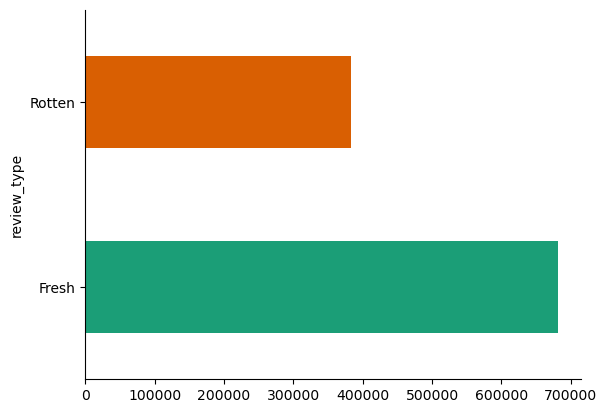

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataCleaned.groupby('review_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
dataCleaned['review_type'].value_counts()

In [ ]:
# here we will remove stopwords, punctuations
# as well as we will apply lemmatization

In [ ]:
import pandas as pd

target_level_1_data = dataCleaned[dataCleaned['review_type'] == 'Fresh']
target_level_2_data = dataCleaned[dataCleaned['review_type'] == 'Rotten']

sampled_data_level_1 = target_level_1_data.sample(n=10000, random_state=42)
sampled_data_level_2 = target_level_2_data.sample(n=10000, random_state=42)

sampled_data = pd.concat([sampled_data_level_1, sampled_data_level_2])

# Reset index if needed
sampled_data.reset_index(drop=True, inplace=True)
print(sampled_data['review_type'].value_counts())

review_type
Fresh     10000
Rotten    10000
Name: count, dtype: int64


In [ ]:
x = sampled_data['review_content']
y = sampled_data['review_type']

### Create a function to clean the data

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

influential_stop_words = {
    'only', 'alone', 'but', 'except', 'however', 'although', 'though', 'neither', 'nevertheless',
    'either', 'yet', 'not', 'no', 'none', 'nobody', 'nothing', 'nowhere', 'nor', 'without', 'except'
}

punct = string.punctuation
stopwords = list(STOP_WORDS - influential_stop_words)


def text_data_cleaning(sentence):
    doc = nlp(sentence)

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens


## Vectorization Feature Engineering (TF-IDF)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

## train the model

In [ ]:
#svm model linear svc
classifier = LinearSVC()

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Fit the x_train and y_train

In [ ]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification
clf.fit(x_train, y_train)

C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000002EABF472480>)),
                ('clf', LinearSVC())])

## Predict the Test set results

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(x_test)
# confusion_matrix
confusion_matrix(y_test, y_pred)
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fresh       0.79      0.79      0.79     59856
      Rotten       0.79      0.79      0.79     60144

    accuracy                           0.79    120000
   macro avg       0.79      0.79      0.79    120000
weighted avg       0.79      0.79      0.79    120000



In [ ]:
accuracy_score(y_test, y_pred)

0.7894166666666667

In [ ]:
clf.predict(["the movie was not good"])

array(['Rotten'], dtype=object)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load pre-trained SentenceTransformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

data=sampled_data
x=data['review_content']
y=data['review_type']

x_encoded=model.encode(x)


x_encoded_train, x_encoded_test, y_train, y_test = train_test_split(x_encoded, y, test_size = 0.2, random_state = 0)

classifier.fit(x_encoded_train, y_train)

# Predict on test set
y_pred = classifier.predict(x_encoded_test)

# Evaluate classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fresh       0.86      0.69      0.77      1994
      Rotten       0.74      0.89      0.81      2006

    accuracy                           0.79      4000
   macro avg       0.80      0.79      0.79      4000
weighted avg       0.80      0.79      0.79      4000



C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
review=model.encode(["the film was not nice overall  !"])
classifier.predict(review)

array(['Rotten'], dtype=object)

## Hyperparameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_encoded_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on test set
test_score = grid_search.score(x_encoded_test, y_test)
print("Test set accuracy:", test_score)


C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DINA\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\svm\_base.py:1244: Conv

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Test set accuracy: 0.8025


## Vader for moview reviews sentiment analysis

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment(review):
    scores = sid.polarity_scores(review)
    if scores['compound'] >= 0.05:
        return 'Fresh'  # Classify as 'Positive' if compound score is positive
    else:
        return 'Rotten'  # Classify as 'Negative' otherwise

# Apply sentiment classification to each review
sampled_data['Predicted_Sentiment'] = sampled_data['review_content'].apply(classify_sentiment)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sampled_data['review_content'], sampled_data['review_type'], test_size=0.2, random_state=42)

# Apply sentiment classification to the training set
y_train_pred = X_train.apply(classify_sentiment)

# Evaluate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print(classification_report(y_train, y_train_pred))

# Apply sentiment classification to the testing set
y_test_pred = X_test.apply(classify_sentiment)

# Evaluate the accuracy of the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.6205625
              precision    recall  f1-score   support

       Fresh       0.61      0.68      0.64      7981
      Rotten       0.64      0.57      0.60      8019

    accuracy                           0.62     16000
   macro avg       0.62      0.62      0.62     16000
weighted avg       0.62      0.62      0.62     16000

Testing Accuracy: 0.63125
              precision    recall  f1-score   support

       Fresh       0.62      0.70      0.66      2019
      Rotten       0.65      0.57      0.60      1981

    accuracy                           0.63      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.63      0.63      0.63      4000

